# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from scipy import stats

import utils

## Training Input Dataset

### Loading Dataset

In [2]:
train_input, train_output = utils.loadTrainingData()

### Dataset Description

In [3]:
train_input
# train_input.shape

,id,angle_1,snap_ring_peak_force,angle_2,rodage_i,snap_ring_final_stroke,vissage_m8_torque,capuchon_insertion,rodage_u,torque_1,start_line_peak_force,vissage_m8_angle,snap_ring_midpoint_force,torque_2
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34510,I-B-XA1207672-190520-00031,158.2,168.40,180.6,110.65,11.88,12.23,NaN,11.98,6.61,24.03,14.8,98.76,6.61
34511,I-B-XA1207672-190906-00270,139.4,146.24,154.5,108.14,12.04,12.27,0.41,11.97,6.41,21.52,15.5,98.37,6.40
34512,I-B-XA1207672-190429-00930,165.5,157.34,149.8,112.77,12.09,12.17,NaN,11.97,6.62,22.65,24.4,92.92,6.62
34513,I-B-XA1207672-190424-02120,152.4,165.07,140.0,111.19,12.06,12.34,NaN,11.97,6.60,20.77,13.6,101.21,6.60


In [4]:
train_input.describe()

,angle_1,snap_ring_peak_force,angle_2,rodage_i,snap_ring_final_stroke,vissage_m8_torque,capuchon_insertion,rodage_u,torque_1,start_line_peak_force,vissage_m8_angle,snap_ring_midpoint_force,torque_2
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,15888.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,156.915055,159.618236,113.350222,11.970190,12.256785,0.388173,11.971027,6.548403,23.630152,17.878398,97.700978,6.550867
std,15.662650,11.271492,15.091490,3.528522,0.169873,0.065319,0.024425,0.003050,0.097602,2.546341,6.785079,6.837714,0.094814
min,101.800000,0.000000,82.000000,99.990000,0.000000,12.030000,0.240000,11.970000,5.670000,0.000000,6.300000,0.000000,5.740000
25%,148.700000,149.210000,149.400000,111.040000,11.850000,12.210000,0.380000,11.970000,6.410000,22.280000,13.500000,94.310000,6.420000
50%,158.000000,156.180000,158.700000,113.160000,12.040000,12.260000,0.390000,11.970000,6.610000,23.880000,16.400000,98.500000,6.610000
75%,169.300000,164.380000,168.900000,115.380000,12.080000,12.300000,0.410000,11.970000,6.620000,25.290000,20.200000,102.230000,6.610000
max,198.300000,196.920000,198.100000,177.950000,12.190000,12.500000,0.420000,11.990000,6.670000,43.410000,84.600000,127.300000,6.670000


**capuchon_insertion**'s standard deviation is quite low ($0.024425$).

array([[<AxesSubplot:title={'center':'angle_1'}>,
        <AxesSubplot:title={'center':'snap_ring_peak_force'}>,
        <AxesSubplot:title={'center':'angle_2'}>,
        <AxesSubplot:title={'center':'rodage_i'}>],
       [<AxesSubplot:title={'center':'snap_ring_final_stroke'}>,
        <AxesSubplot:title={'center':'vissage_m8_torque'}>,
        <AxesSubplot:title={'center':'capuchon_insertion'}>,
        <AxesSubplot:title={'center':'rodage_u'}>],
       [<AxesSubplot:title={'center':'torque_1'}>,
        <AxesSubplot:title={'center':'start_line_peak_force'}>,
        <AxesSubplot:title={'center':'vissage_m8_angle'}>,
        <AxesSubplot:title={'center':'snap_ring_midpoint_force'}>],
       [<AxesSubplot:title={'center':'torque_2'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

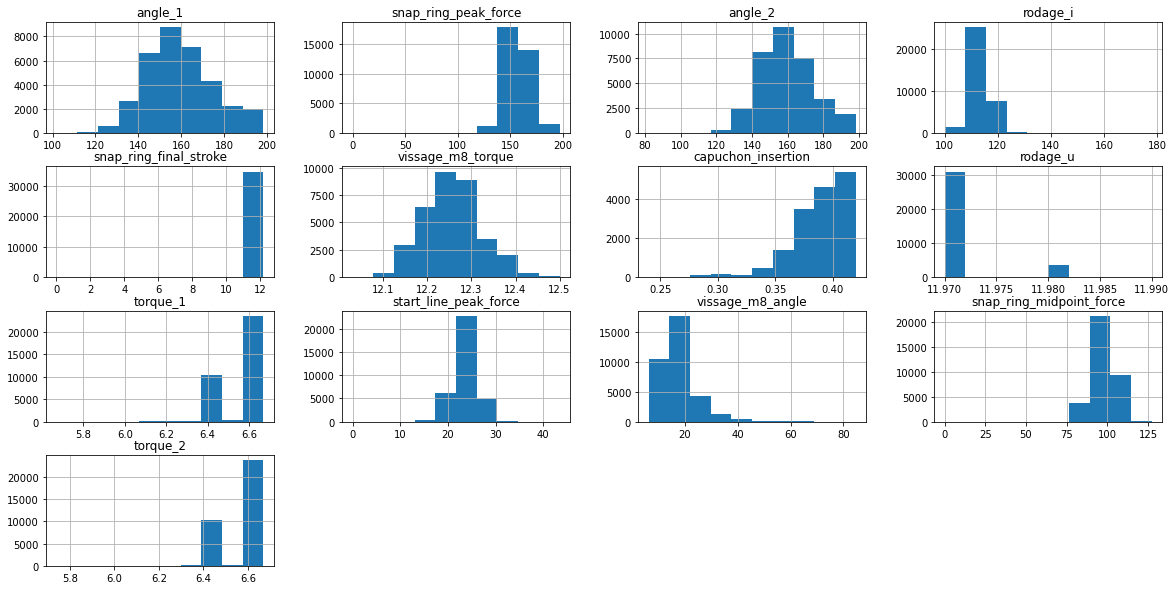

In [5]:
train_input.hist(figsize=(20,10))

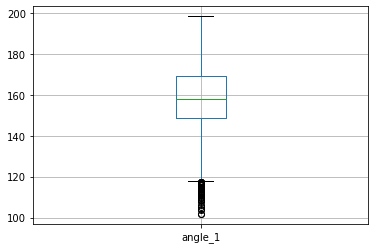

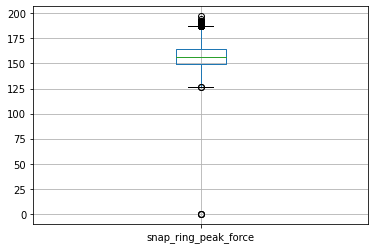

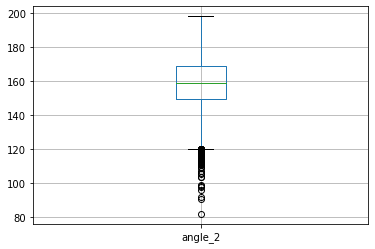

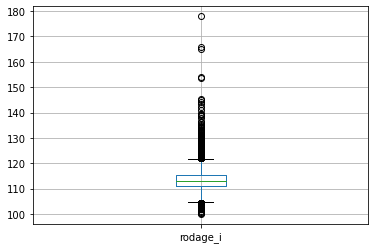

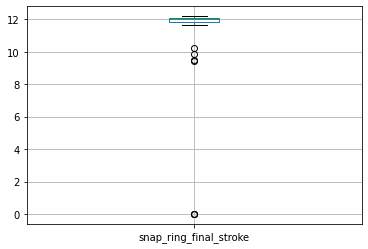

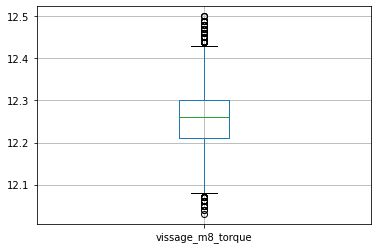

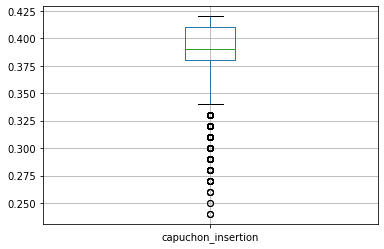

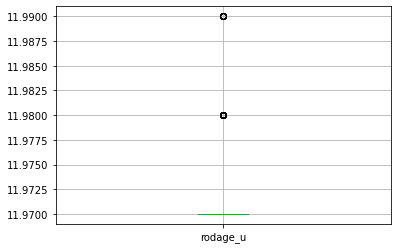

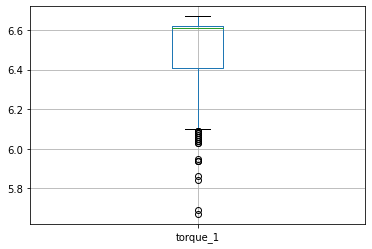

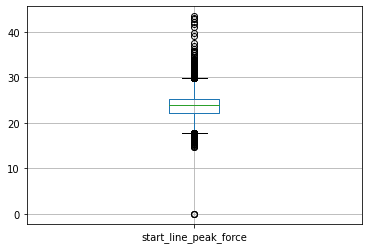

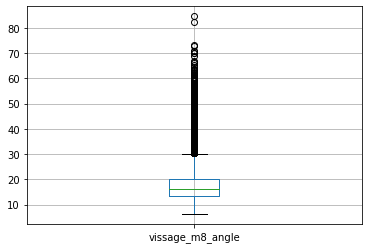

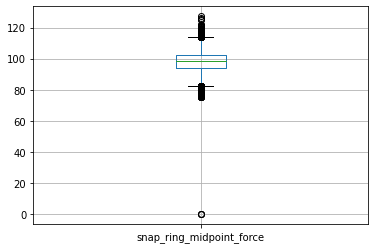

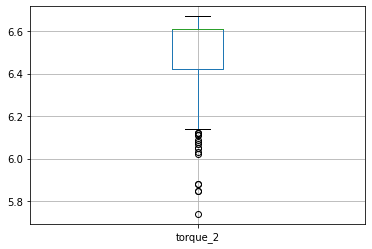

In [6]:
# train_input.boxplot(column=train_input.columns.tolist()[1:], figsize=(20,10))

for column in train_input.columns.tolist()[1:]:
    plt.figure()
    train_input.boxplot([column])

### Features Correlation

In [7]:
train_input.corr()

,angle_1,snap_ring_peak_force,angle_2,rodage_i,snap_ring_final_stroke,vissage_m8_torque,capuchon_insertion,rodage_u,torque_1,start_line_peak_force,vissage_m8_angle,snap_ring_midpoint_force,torque_2
angle_1,1.000000,0.008887,0.186781,0.035003,-0.087910,-0.017578,-0.024779,-0.007284,-0.012960,0.057592,0.014374,0.066924,0.073814
snap_ring_peak_force,0.008887,1.000000,0.038399,0.055235,0.076451,-0.134780,-0.193211,0.135288,0.489633,0.336620,0.106753,0.345139,0.481550
angle_2,0.186781,0.038399,1.000000,0.036301,-0.060931,-0.030284,0.005722,0.003245,0.059178,0.047190,0.017727,0.050193,0.017812
rodage_i,0.035003,0.055235,0.036301,1.000000,0.060014,-0.046313,0.053972,-0.118751,0.034240,0.002962,0.025043,0.046556,0.034342
snap_ring_final_stroke,-0.087910,0.076451,-0.060931,0.060014,1.000000,-0.095903,0.307973,-0.022536,-0.380948,-0.381450,0.022764,-0.081412,-0.407915
vissage_m8_torque,-0.017578,-0.134780,-0.030284,-0.046313,-0.095903,1.000000,-0.023820,-0.031115,-0.076357,0.009997,-0.445953,-0.057760,-0.073071
capuchon_insertion,-0.024779,-0.193211,0.005722,0.053972,0.307973,-0.023820,1.000000,-0.087928,-0.522733,-0.209883,-0.094913,0.016094,-0.532577
rodage_u,-0.007284,0.135288,0.003245,-0.118751,-0.022536,-0.031115,-0.087928,1.000000,0.169246,0.087487,0.013814,0.057027,0.172109
torque_1,-0.012960,0.489633,0.059178,0.034240,-0.380948,-0.076357,-0.522733,0.169246,1.000000,0.543089,0.112377,0.334814,0.896698
start_line_peak_force,0.057592,0.336620,0.047190,0.002962,-0.381450,0.009997,-0.209883,0.087487,0.543089,1.000000,0.043943,0.620728,0.562435


In [8]:
# plt.matshow(train_input.corr())
# plt.show()

In [9]:
sns.pairplot(train_input)
plt.show()

### NA Values

In [ ]:
train_input.isna().sum()

**capuchon_insertion** might not be a relevent parameter, more than 50% of the population is na ($\frac{18627}{34515} \approx 0.53967840069$).  
But nan values could also be filed with the average value as shown below...  
If every/most defective individual is set to na then we can eliminate this feature.   

In [ ]:
mean = train_input["capuchon_insertion"].mean()
capuchon_insertion_no_nan = train_input["capuchon_insertion"].fillna(mean, inplace=False)
capuchon_insertion_no_nan

In [ ]:
train_input_defect = train_input.copy() # Deep copy
defect_index = train_output.index[train_output["result"] == 1].tolist()
train_input_defect = train_input_defect.iloc[defect_index,:]
train_input_defect.isna().sum()

Among the 305 defective individuals, 110 of them do not have a **capuchon_insertion** value ($\frac{110}{305} \approx 0.3606$).  
Most of the defective individuals have a **capuchon_insertion** value, maybe it is worth keeping it...  

### PCA

#### Unscaled

In [ ]:
# Load dataset for PCA
train_input_pca, _ = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)

# PCA
pca = PCA()
pca.fit(train_input_pca)

pca.explained_variance_ratio_
plt.xticks(range(12))
plt.plot(range(12), pca.explained_variance_ratio_)

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.xticks(range(12))
plt.plot(range(12), cumsum)

In [ ]:
pca_model = PCA(n_components=12).fit(train_input_pca)
X_pca = pca_model.transform(train_input_pca)

# Number of components
nb_comp = pca_model.components_.shape[0]

# Index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca_model.components_[i]).argmax() for i in range(nb_comp)]

# Features names
initial_feature_names = pca_model.feature_names_in_

# Name of the most important feature on EACH component
most_important_names = [initial_feature_names[most_important[i]] for i in range(nb_comp)]

dic = {'PC{}'.format(i+1) : most_important_names[i] for i in range(nb_comp)}

# build the dataframe
# df = pd.DataFrame(sorted(dic.items()))

dic

In [ ]:
# Create 3D figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')

# Plot with color
colors = {1: 'red', 0: 'green'}
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=train_output["result"].map(colors))

# Set labels
ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

# Show figure
plt.show()

In [ ]:
# Create 2D figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

# Plot with color and transparency
colors = {1: 'red', 0: 'green'}
alphas = {1: 1, 0: 0.1}
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=train_output["result"].map(colors), alpha=train_output["result"].map(alphas))

# Set labels
ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')

# Show figure
plt.show()

#### Scaled

In [ ]:
# Load dataset for PCA
train_input_pca_scale, _ = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)

# Scale data
standard_scaler = StandardScaler(copy=False)
standard_scaler.fit_transform(train_input_pca_scale)

# PCA
scaled_pca = PCA()
scaled_pca.fit(train_input_pca_scale)

scaled_pca.explained_variance_ratio_
plt.xticks(range(12))
plt.plot(range(12), scaled_pca.explained_variance_ratio_)

In [ ]:
scaled_cumsum = np.cumsum(scaled_pca.explained_variance_ratio_)
plt.xticks(range(12))
plt.plot(range(12), scaled_cumsum)

In [ ]:
scaled_pca_model = PCA(n_components=12).fit(train_input_pca_scale)
X_scaled_pca = scaled_pca_model.transform(train_input_pca_scale)

# Number of components
nb_comp = scaled_pca_model.components_.shape[0]

# Index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(scaled_pca_model.components_[i]).argmax() for i in range(nb_comp)]

# Features names
initial_feature_names = scaled_pca_model.feature_names_in_

# Name of the most important feature on EACH component
most_important_names = [initial_feature_names[most_important[i]] for i in range(nb_comp)]

scaled_dic = {'PC{}'.format(i+1) : most_important_names[i] for i in range(nb_comp)}

# build the dataframe
# df = pd.DataFrame(sorted(dic.items()))

scaled_dic

In [ ]:
# X_scaled_pca[:, :3]

# Create 3D figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')

# Plot with color
colors = {1:'red', 0:'green'}
ax.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], X_scaled_pca[:, 2], c=train_output["result"].map(colors))

# Set labels
ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_zlabel('Dim 3')

# Show figure
plt.show()


In [ ]:
# Create 2D figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

# Plot with color and transparency
colors = {1: 'red', 0: 'green'}
alphas = {1: 1, 0: 0.1}
ax.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=train_output["result"].map(colors), alpha=train_output["result"].map(alphas))

# Set labels
ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')

# Show figure
plt.show()

### Removing Outliers

In [ ]:
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = train_test_split(train_input, train_output, test_size = 0.3, random_state = 123)

# Scale data (MLP is very sensitive to scaling)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Scale data (MLP is very sensitive to scaling)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Copy dataset
train_input_remove = train_input.copy()
train_output_remove = train_output.copy()

# Scale data (MLP is very sensitive to scaling and allow for a unique treshold)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# Find outliers

input_header = {"PROC_TRACEINFO": "id",
                    "OP070_V_1_angle_value": "angle_1",
                    "OP090_SnapRingPeakForce_value": "snap_ring_peak_force",
                    "OP070_V_2_angle_value": "angle_2",
                    "OP120_Rodage_I_mesure_value": "rodage_i",
                    "OP090_SnapRingFinalStroke_value": "snap_ring_final_stroke",
                    "OP110_Vissage_M8_torque_value": "vissage_m8_torque",
                    "OP100_Capuchon_insertion_mesure": "capuchon_insertion",
                    "OP120_Rodage_U_mesure_value": "rodage_u",
                    "OP070_V_1_torque_value": "torque_1",
                    "OP090_StartLinePeakForce_value": "start_line_peak_force",
                    "OP110_Vissage_M8_angle_value": "vissage_m8_angle",
                    "OP090_SnapRingMidPointForce_val": "snap_ring_midpoint_force",
                    "OP070_V_2_torque_value": "torque_2"}

threshold = 3
outliers = np.array([], dtype = int)
for col_name in list(input_header.values())[1:]:
    z = np.abs(stats.zscore(train_input[col_name]))
    outliers = np.append(outliers, np.where(z > threshold))
outliers_no_duplicate = np.array([], dtype=int)
for i in range(np.size(outliers)):
    if(outliers[i] not in outliers_no_duplicate):
        outliers_no_duplicate = np.append(outliers_no_duplicate, outliers[i])
np.size(outliers_no_duplicate)

# Randomly remove some valid individuals
train_input_remove = train_input_remove.iloc[~outliers_no_duplicate,:]

# Create new datasets
train_input_remove = train_input_remove[train_input_remove.columns[~train_input_remove.columns.isin(["id", "capuchon_insertion"])]]

for column in train_input_remove.columns.tolist()[1:]:
    plt.figure()
    train_input_remove.boxplot([column])

## Training Output Dataset

In [ ]:
_, train_output = utils.loadTrainingData()
train_output
# train_output.shape

In [ ]:
# train_output_bool = train_output.copy() # Deep copy
# train_output_bool["result"] = train_output_bool["result"].astype(bool)
# train_output_bool

In [ ]:
train_output["result"].value_counts()

Unbalanced result classes. Defect class is under-represented in the population ($\frac{305}{34515} \approx 0.008836737650296972$).